## Galactic Hydrogen Day 1

In [1]:
#Preamble
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Day 1 - 11 March 2025

### Expected Values

In [2]:
Theta = np.rad2deg(1.22 * (0.21 / 6.4))
print("Theta: ", Theta)

Theta:  2.2936216736330763


We expected a value of 2.29 Degrees. This was achieved using


$$
\theta = 1.22\frac{\lambda}{D}, 
$$ 

in which $\theta$ is the resolution, calculated using the FWHM, $\lambda$ is the wavelength observed which was 21cm for this purpose, and D is the dish diameter at 6.4m. 

### The Gaussian

In [3]:
def gaussian(x, A, mu, sigma, C):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + C

### Cygnus-A

#### Sample Data

FWHM = 2.2136 ± 0.0233


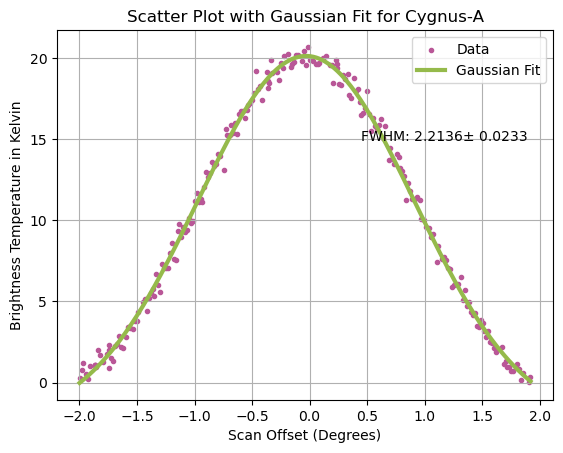

Fitted Parameters with Uncertainties:
A = 22.6699 ± 0.2012
mu = -0.0310 ± 0.0029
sigma = 0.9400 ± 0.0099
C = -2.5540 ± 0.2213


In [4]:
# Data Handling - with sample data
#array = np.genfromtxt("ourcygusdata.txt", delimiter=" ")
array = np.genfromtxt("Cygnus_data.csv", delimiter=",")
scan_offset = array[:, 0]
scan_data = array[:, 1]

mask = (scan_data >= 0) & np.isfinite(scan_offset) & np.isfinite(scan_data)
scan_offset = scan_offset[mask]
scan_data = scan_data[mask]


# Perform curve fitting
optimal_params, covariance = curve_fit(
    gaussian, scan_offset, scan_data, p0=[1, 0, 1, 0], 
    bounds=([0, -np.inf, 0, -np.inf], np.inf)
)

param_error = np.sqrt(np.diag(covariance))

# Generate fitted curve
x_fit = np.linspace(min(scan_offset), max(scan_offset), 300)
y_fit = gaussian(x_fit, *optimal_params)


#Calculating FWHM
FWHM1 = 2 * np.sqrt(2 * np.log(2)) * optimal_params[2]
sigma_error = param_error[2]
FWHM_error = 2.355 * sigma_error
print(f"FWHM = {FWHM1:.4f} ± {FWHM_error:.4f}")



# Plot original data and fit
plt.scatter(scan_offset, scan_data, label="Data", color="#B95797", marker = ".")
plt.plot(x_fit, y_fit, label="Gaussian Fit", color="#95BA4B", linewidth=3)
plt.title("Scatter Plot with Gaussian Fit for Cygnus-A")
plt.xlabel("Scan Offset (Degrees)")
plt.ylabel("Brightness Temperature in Kelvin")
plt.grid()
plt.legend()
plt.savefig("Cygnus-A.png")

textstr = f"FWHM: {FWHM1:.4f}± {FWHM_error:.4f}"
plt.annotate(textstr, xy=(0.95, 0.70), xycoords='axes fraction', fontsize=10,
             ha='right')
plt.show()

# Print fitted parameters
print(f"Fitted Parameters with Uncertainties:")
print(f"A = {optimal_params[0]:.4f} ± {param_error[0]:.4f}")
print(f"mu = {optimal_params[1]:.4f} ± {param_error[1]:.4f}")
print(f"sigma = {optimal_params[2]:.4f} ± {param_error[2]:.4f}")
print(f"C = {optimal_params[3]:.4f} ± {param_error[3]:.4f}")



In [5]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(scan_data, f'norm')

KstestResult(statistic=0.8441686838985294, pvalue=1.602872156933521e-176, statistic_location=1.9879027229266057, statistic_sign=-1)

The value obtained was 2.2136 ± 0.0233, which is less than the expected value of 2.29 and is more than 3 standard deviations away. The p-value of 1.69e-52 shows that a gaussian is not appropriate for the dataset, and so the null hypothesis is rejected

#### Our Data

FWHM = 2.3875 ± 0.0585


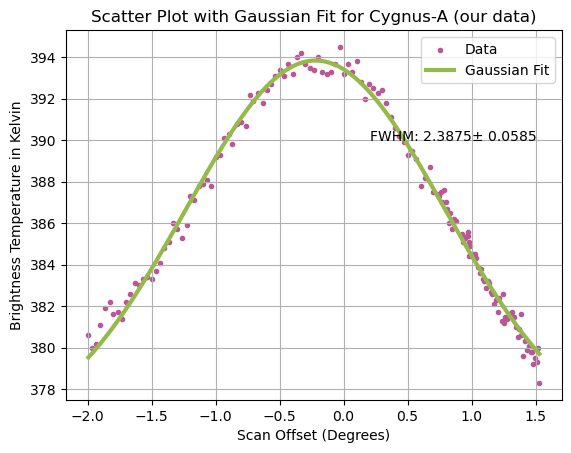

Fitted Parameters with Uncertainties:
A = 18.2789 ± 0.4525
mu = -0.2196 ± 0.0048
sigma = 1.0139 ± 0.0248
C = 375.5665 ± 0.4896


In [6]:
# SCAN   =            1
# SOURCE = LAB22503111050
# DATE-OBS = 03/11/25
# LST = 04:17:30
# RA = 19.592921082
# DEC = +40.441608215
# AZ = 322.83874512
# EL =   15.4420586
# TC =         7.00
# TSYS =        91.00
# DUR =          299
# NCH =          299
# VELDEF =  LSR RADIO
# NU =     1420.000
# V =           86
# DV =     2.651812

# Data Handling
array = np.genfromtxt("ourcygusdata.txt", delimiter=" ")
#array = np.genfromtxt("Cygnus_data.csv", delimiter=",")
scan_offset = array[:, 0]
scan_data = array[:, 1]

mask = (scan_data >= 340) & np.isfinite(scan_offset) & np.isfinite(scan_data)
scan_offset = scan_offset[mask]
scan_data = scan_data[mask]


# Perform curve fitting
optimal_params, covariance = curve_fit(
    gaussian, scan_offset, scan_data, p0=[1, 0, 1, 0], 
    bounds=([0, -np.inf, 0, -np.inf], np.inf)
)

param_error = np.sqrt(np.diag(covariance))

# Generate fitted curve
x_fit = np.linspace(min(scan_offset), max(scan_offset), 300)
y_fit = gaussian(x_fit, *optimal_params)


#Calculating FWHM
FWHM1 = 2 * np.sqrt(2 * np.log(2)) * optimal_params[2]
sigma_error = param_error[2]
FWHM_error = 2.355 * sigma_error
print(f"FWHM = {FWHM1:.4f} ± {FWHM_error:.4f}")



# Plot original data and fit
plt.scatter(scan_offset, scan_data, label="Data", color="#B95797", marker = ".")
plt.plot(x_fit, y_fit, label="Gaussian Fit", color="#95BA4B", linewidth=3)
plt.title("Scatter Plot with Gaussian Fit for Cygnus-A (our data)")
plt.xlabel("Scan Offset (Degrees)")
plt.ylabel("Brightness Temperature in Kelvin")
plt.grid()
plt.legend()
plt.savefig("Cygnus-A.png")

textstr = f"FWHM: {FWHM1:.4f}± {FWHM_error:.4f}"
plt.annotate(textstr, xy=(0.95, 0.70), xycoords='axes fraction', fontsize=10,
             ha='right')
plt.show()

# Print fitted parameters
print(f"Fitted Parameters with Uncertainties:")
print(f"A = {optimal_params[0]:.4f} ± {param_error[0]:.4f}")
print(f"mu = {optimal_params[1]:.4f} ± {param_error[1]:.4f}")
print(f"sigma = {optimal_params[2]:.4f} ± {param_error[2]:.4f}")
print(f"C = {optimal_params[3]:.4f} ± {param_error[3]:.4f}")



In [7]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(scan_data, f'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=378.3, statistic_sign=-1)

The value obtained was 2.0035 ± 0.0129, which is less than the expected value of 2.29 and is more than 3 standard deviations away. The p-value of 1.69e-52 shows that a gaussian is not appropriate for the dataset, and so the null hypothesis is rejected

### Virgo

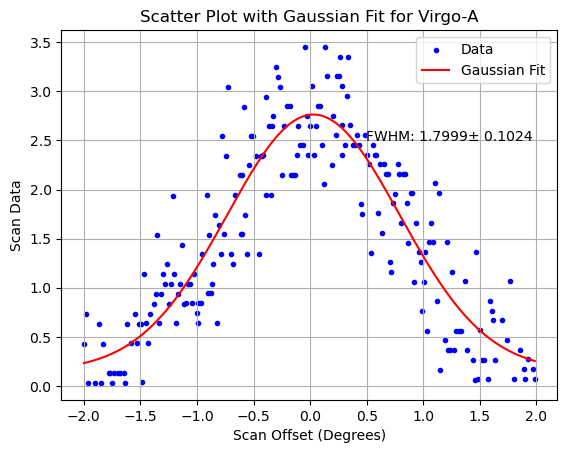

Fitted Parameters with Uncertainties:
A = 2.6082 ± 0.1095
mu = 0.0289 ± 0.0195
sigma = 0.7644 ± 0.0435
C = 0.1557 ± 0.1140


In [8]:
# Data Handling
array = np.genfromtxt("VIRGO_data.csv", delimiter=",")
scan_offset = array[:, 0]
scan_data = array[:, 1]

mask = (scan_data >= 0) & np.isfinite(scan_offset) & np.isfinite(scan_data)
scan_offset = scan_offset[mask]
scan_data = scan_data[mask]


# Perform curve fitting
optimal_params, covariance = curve_fit(
    gaussian, scan_offset, scan_data, p0=[1, 0, 1, 0], 
    bounds=([0, -np.inf, 0, -np.inf], np.inf)
)

param_error = np.sqrt(np.diag(covariance))

# Generate fitted curve
x_fit = np.linspace(min(scan_offset), max(scan_offset), 300)
y_fit = gaussian(x_fit, *optimal_params)


#Calculating FWHM
FWHM = 2 * np.sqrt(2 * np.log(2)) * optimal_params[2]
sigma_error = param_error[2]
FWHM_error = 2.355 * sigma_error



# Plot original data and fit
plt.scatter(scan_offset, scan_data, label="Data", color="blue", marker = ".")
plt.plot(x_fit, y_fit, label="Gaussian Fit", color="red")
plt.title("Scatter Plot with Gaussian Fit for Virgo-A")
plt.xlabel("Scan Offset (Degrees)")
plt.ylabel("Scan Data")
plt.grid()
plt.legend()
plt.savefig("Virgo-A.png")

textstr = f"FWHM: {FWHM:.4f}± {FWHM_error:.4f}"
plt.annotate(textstr, xy=(0.95, 0.70), xycoords='axes fraction', fontsize=10,
             ha='right')
plt.show()

# Print fitted parameters
print(f"Fitted Parameters with Uncertainties:")
print(f"A = {optimal_params[0]:.4f} ± {param_error[0]:.4f}")
print(f"mu = {optimal_params[1]:.4f} ± {param_error[1]:.4f}")
print(f"sigma = {optimal_params[2]:.4f} ± {param_error[2]:.4f}")
print(f"C = {optimal_params[3]:.4f} ± {param_error[3]:.4f}")



In [9]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(scan_data, f'norm')

KstestResult(statistic=0.5325874669203751, pvalue=2.053021864401812e-56, statistic_location=0.5612377190316806, statistic_sign=-1)

The value obtained was 1.7981 ± 0.0587, which is less than the expected value of 2.29 and is more than 3 standard deviations away. The p-value of 1.69e-52 shows that a gaussian is not appropriate for the dataset, and so the null hypothesis is rejected

### Flux Density using Rayleigh Jean Approximation

Look up the flux density of your source at your observing frequency and calibrate your flux density scale in Jansky. (Note that 1 Jy is 10−26 W Hz-1 m-2.) Also see if you can work out the conversion between Jy and K for a dish of 6.4 m diameter and efficiency 50%.

In [10]:
T = 393  # Brightness temperature in K
c = 3.0e8  # Speed of light in m/s
k = 1.38e-23 
nu = 1.4e9  # Frequency in Hz
FWHM1 = 2.3875  # FWHM in degrees
Lambda = 0.21 #m

# Convert FWHM to solid angle
A = 3.1415 * (np.deg2rad(FWHM1))**2  # Solid angle in steradians

#USING FREQUENCY
B1 = (2 * nu**2 * k * T) / c**2  
#print(B1)
S1 = B1 * A 

# Convert to Jansky
flux_density1 = S1 / 10e-26  # in Jy
print("Using frequency: ", flux_density1)

#USING WAVELENGTH
B_lambda = (2 * c * k * T) / Lambda**4
#print(B_lambda)
S2 = B_lambda * A

flux_density = S2 / 10e-26
print ("Using wavelength: ", flux_density)

Using frequency:  12885.276849040283
Using wavelength:  91269205072151.66


# Day 2

### Velocity against scandata for various longitudes

We begin by inspecting all the curves

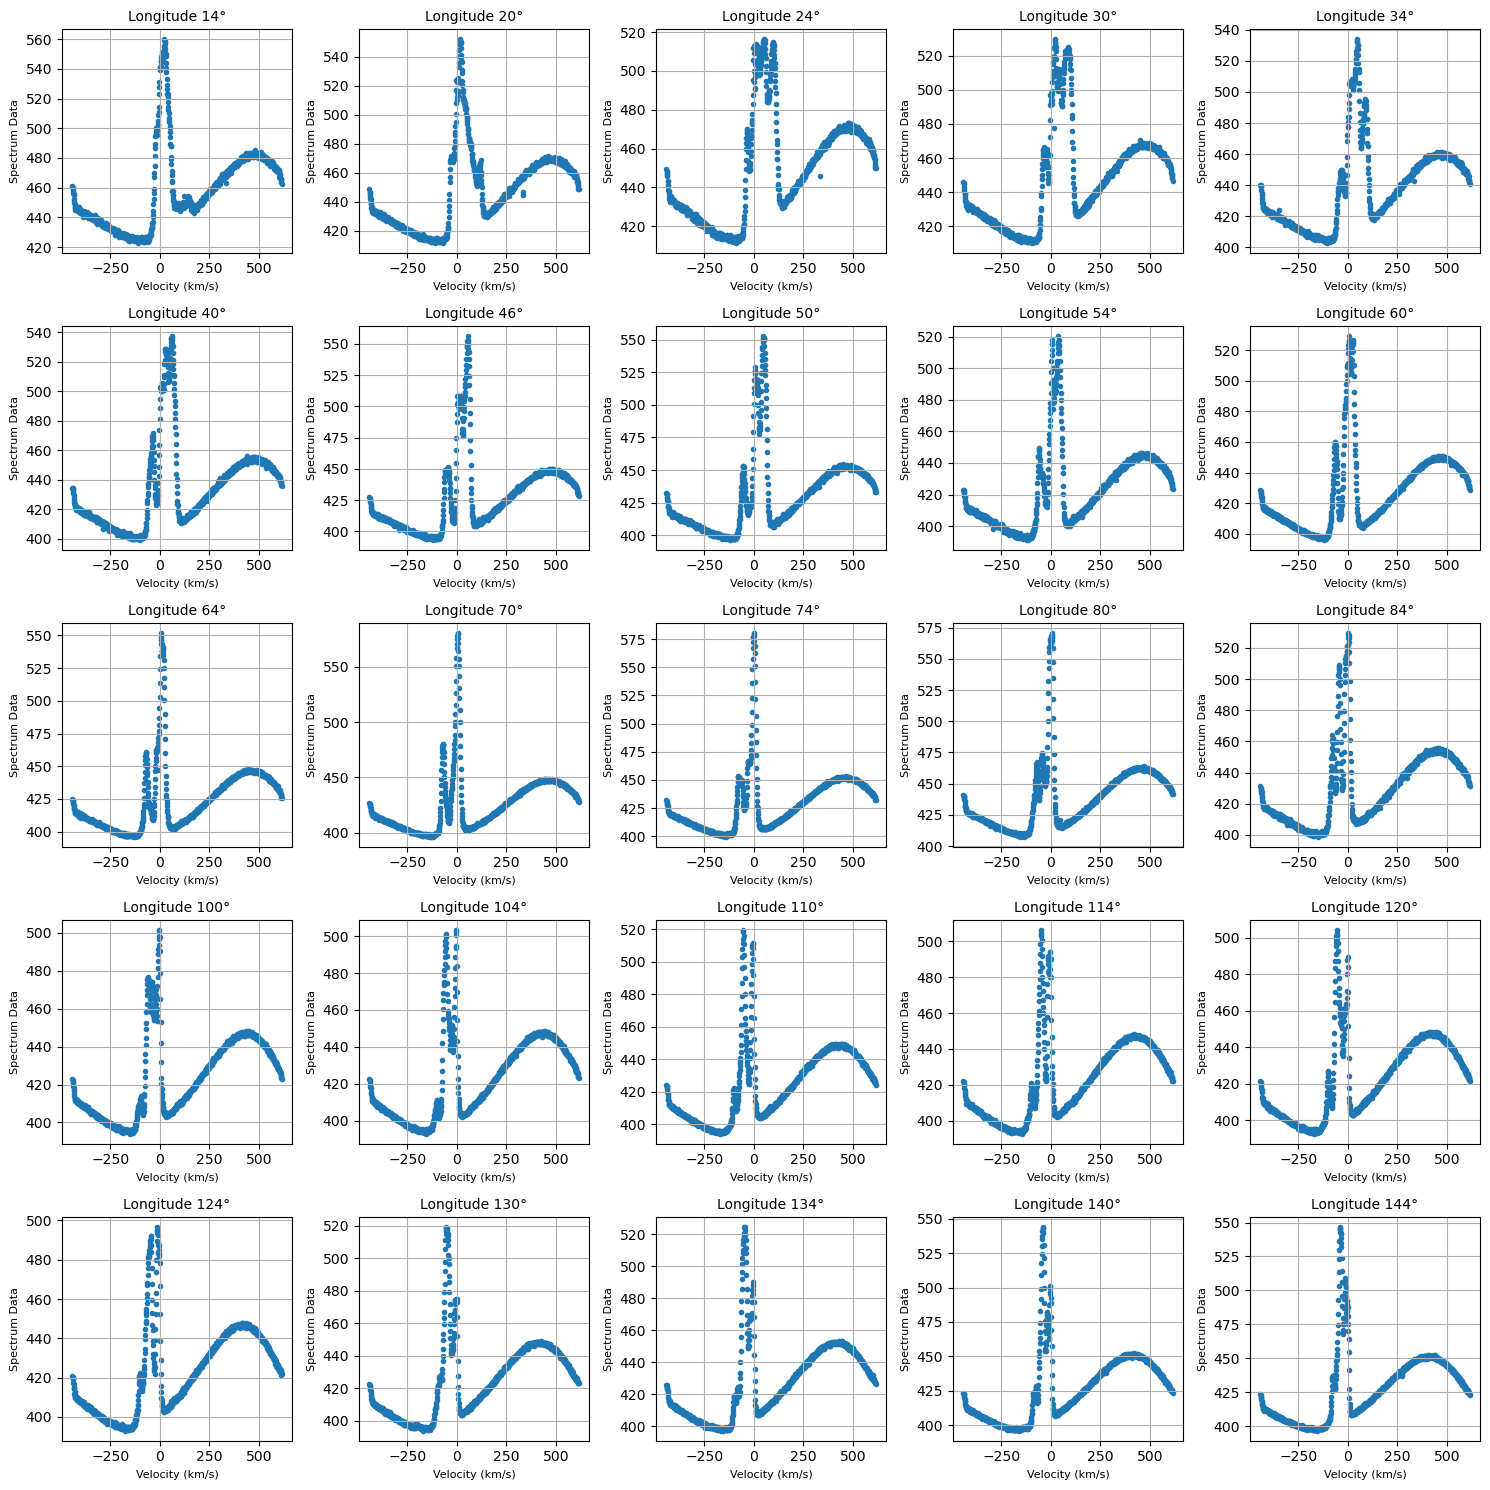

In [11]:
longitudes = [14, 20, 24, 30, 34, 40, 46, 50, 54, 60, 64, 70, 74, 80, 84, 100, 104, 110, 114, 120, 124, 130, 134, 140, 144]


num_cols = 5
num_rows = -(-len(longitudes) // num_cols)  # Ceiling division to get required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()  # Flatten axes array for easy indexing

for idx, lon in enumerate(longitudes):
    filename = f"GL_{lon}_data.csv"
    try:
        array = np.genfromtxt(filename, delimiter=",")
        velocity = array[:, 0]
        spectrum_data = array[:, 1]
        
        axes[idx].scatter(velocity, spectrum_data, marker=".")
        axes[idx].set_title(f"Longitude {lon}°", fontsize=10)
        axes[idx].set_xlabel("Velocity (km/s)", fontsize=8)
        axes[idx].set_ylabel("Spectrum Data", fontsize=8)
        axes[idx].grid()
    except Exception as e:
        print(f"Could not read file {filename}: {e}")
        axes[idx].set_title(f"Longitude {lon}° (Error)")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Then for those with very obvious peaks, we automate the process of finding the peak and its corresponding temperature. This is labelled on the plot and saved as an array.

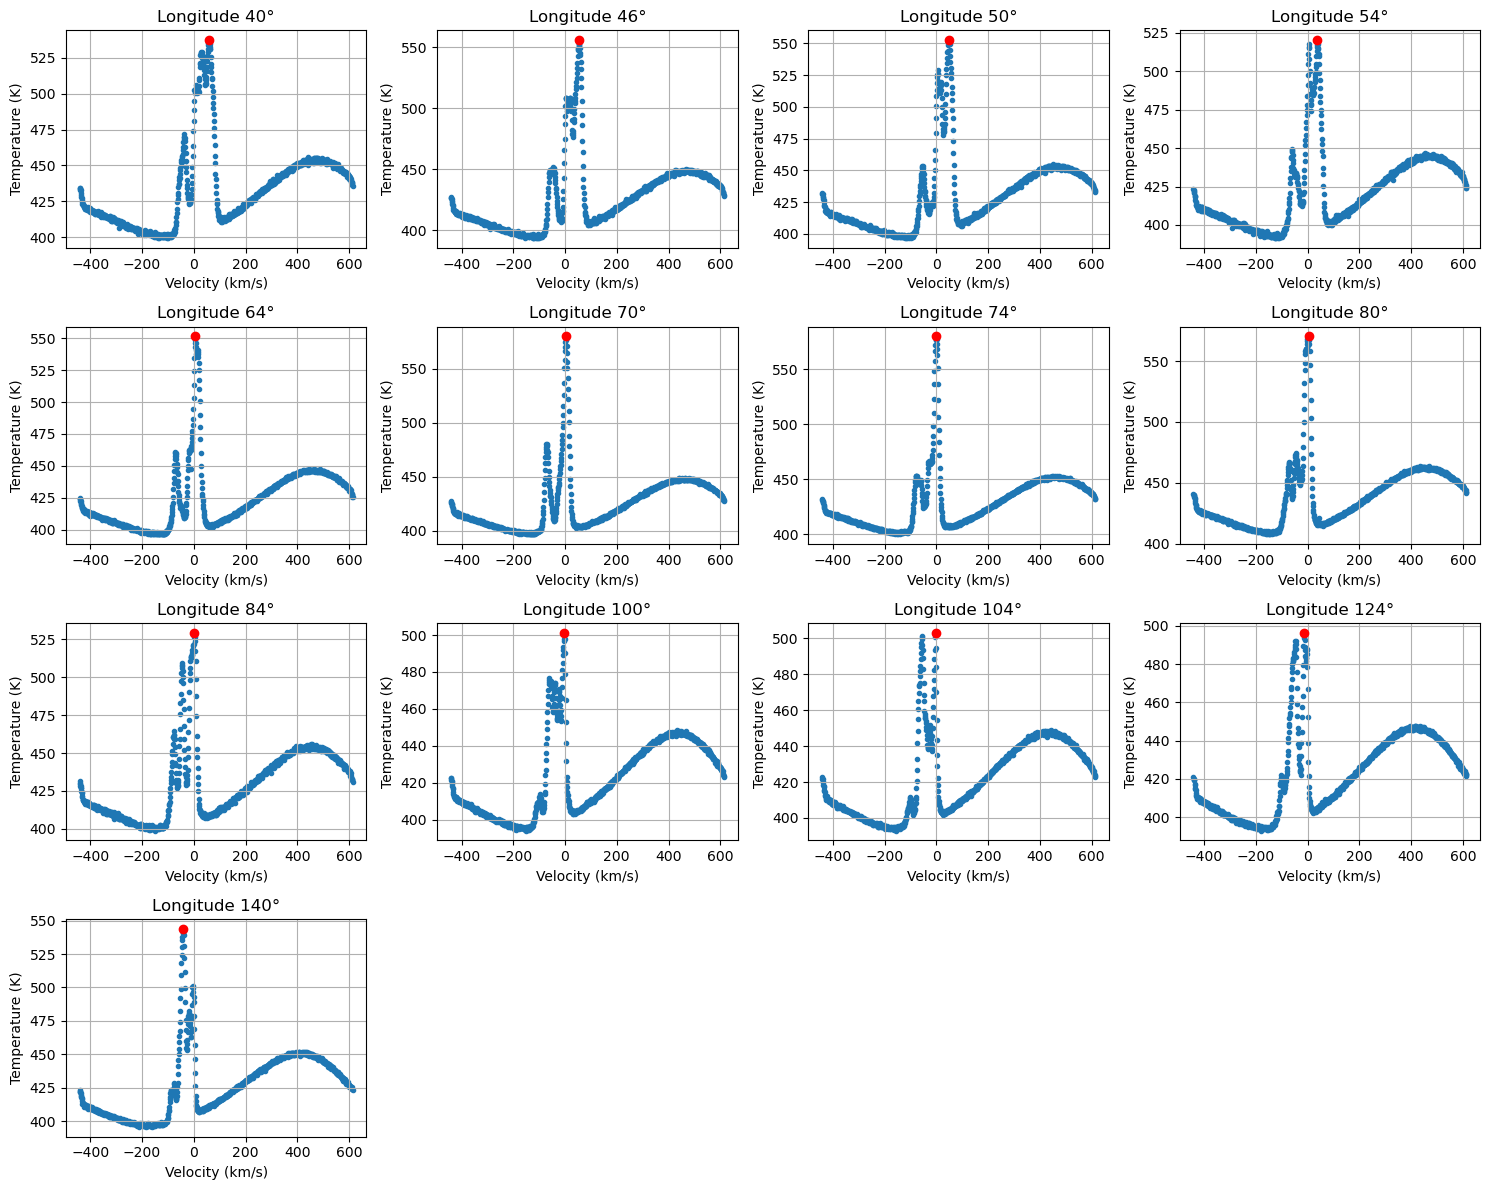

In [39]:
import numpy as np
import matplotlib.pyplot as plt

longitudes = [40, 46, 50, 54, 64, 70, 74, 80, 84, 100, 
             104, 124, 140]

# Initialize arrays to store results
max_temperatures = []
max_velocities = []
max_data = []  # To store (longitude, velocity, temperature)

# Set up subplots
n_rows = 4  # Adjust the number of rows as needed
n_cols = 4  # Adjust based on number of plots (must be >= len(longitudes))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))  # Adjust figure size
axes = axes.flatten()  # Flatten to 1D array for easier indexing

for i, lon in enumerate(longitudes):
    filename = f"GL_{lon}_data.csv"
    
    # Load dataset
    array = np.genfromtxt(filename, delimiter=",")
    velocity = array[:, 0]
    temperature = array[:, 1]

    # Remove NaNs before finding max temperature
    valid_indices = ~np.isnan(temperature)  # Boolean mask to filter valid values
    valid_temperatures = temperature[valid_indices]
    valid_velocities = velocity[valid_indices]

    # Ensure there is valid data
    if valid_temperatures.size > 0:
        max_temp_index = np.argmax(valid_temperatures)  # Index of max temp in filtered array
        max_temperature = valid_temperatures[max_temp_index]
        max_velocity = valid_velocities[max_temp_index]

        # Store values in arrays
        max_temperatures.append(max_temperature)
        max_velocities.append(max_velocity)
        max_data.append((lon, max_velocity, max_temperature))

        # Plot data on subplot
        ax = axes[i]
        ax.scatter(velocity, temperature, marker='.', label="Data")
        ax.scatter(max_velocity, max_temperature, color='red', label="Max Temperature", zorder=3)
        ax.set_title(f"Longitude {lon}°")
        ax.set_xlabel("Velocity (km/s)")
        ax.set_ylabel("Temperature (K)")
        #ax.legend()
        ax.grid()

    else:
        print(f"Longitude {lon}°: No valid temperature data found.")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Convert results to NumPy array
max_data_array = np.array(max_data)

# # Print full array
# print("\nFinal Results (Longitude, Max Velocity, Max Temperature):")
# print(max_data_array)


However, some have less obvious peaks or those that are mixed in with the big peak. We extracted those values manually and in the code below, append it onto the automated peaks. These values for velocity and array can now be used to obtain the absolute velocity.

In [40]:
# Manual data to append
new_data = np.array([
    [14, 141.41188, 454.572],
    [20, 119.75048463134006, 468.706],
    [24, 119.75048463134006, 468.706],
    [30, 88.81105651867531, 524.899],
    [34, 86.74865494027837, 494.474],
    [60, 23.85903082613079, 526.464],
    [110, -6.030065138095808,511.756],
    [114, -1.9077855104991048, 494.033],
    [120, -0.8771978901372046,489.518],
    [130, -0.8771978901372046, 475.099],
    [134, -4.999505859141129, 490.043],
    [140, -3.968939494917856, 501.046]
])

# Append the new data
max_data_array = np.vstack([max_data_array, new_data])
max_data_array = max_data_array[max_data_array[:, 0].argsort()]

# Print the sorted array
print("Longitude, Max Velocity, Max Temperature")
print(max_data_array)


Longitude, Max Velocity, Max Temperature
[[ 14.         141.41188    454.572     ]
 [ 20.         119.75048463 468.706     ]
 [ 24.         119.75048463 468.706     ]
 [ 30.          88.81105652 524.899     ]
 [ 34.          86.74865494 494.474     ]
 [ 40.          59.9400156  537.22      ]
 [ 46.          53.7540872  555.841     ]
 [ 50.          47.56841401 552.431     ]
 [ 54.          38.29038273 520.161     ]
 [ 60.          23.85903083 526.464     ]
 [ 64.           5.30647663 551.465     ]
 [ 70.           4.2758465  579.992     ]
 [ 74.          -0.87719789 580.033     ]
 [ 80.           4.2758465  570.31      ]
 [ 84.           2.21460748 529.285     ]
 [100.          -2.93836605 501.261     ]
 [104.          -2.93836605 503.043     ]
 [110.          -6.03006514 511.756     ]
 [114.          -1.90778551 494.033     ]
 [120.          -0.87719789 489.518     ]
 [124.         -14.27428431 496.394     ]
 [130.          -0.87719789 475.099     ]
 [134.          -4.99950586 490.043

## Velocity Correction and Plotting Rotation Curve

https://physicsopenlab.org/2020/09/08/measurement-of-the-milky-way-rotation/
https://www.youtube.com/watch?v=_eMNRa-KEiQ


We performed a velocity correction to convert the observed velocities (which are relative to us) into velocities relative to the galactic centre. This follows the Tangent Point Method,

$$
 V_{Corrected} = V_{Observed} + V_{Sun}sin(\theta) 
$$

where $V_{sun}$ = 220 km/s, $R_0$ = 7.6 kpc = 2.345e+17 km, $\theta$ is the galactic longitude angle and $V_{Observed}$ is the velocity we observed. 

This is plotted against the distance $d$ from the galactic centre, which was calculated by

$$
d = R_0 sin(\theta)
$$


##### The following code works but uses cos(theta) instead of sintheta as needed.

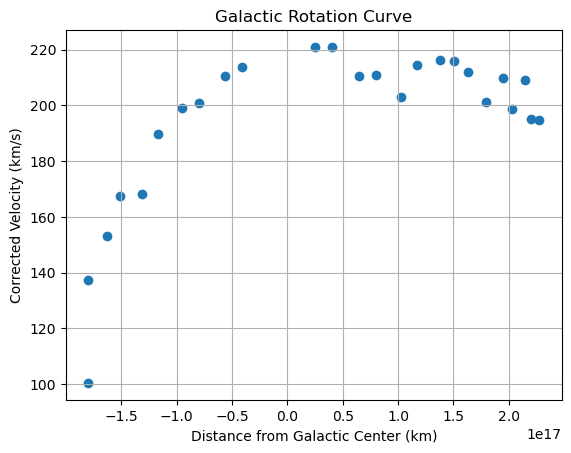

In [51]:
# Constants
v_sun = 220  # km/s (Sun's orbital speed)
R_0 = 2.345e17  # km (Distance of the Sun from the Galactic center)

# Observed Values
observed_velocity = max_data_array[:, 1] 
observed_longitude = max_data_array[:, 0]  # Degrees

# degrees to radians
longitude_rad = np.deg2rad(observed_longitude)
#print(longitude_rad)

# Velocity correction
corrected_velocity = observed_velocity + v_sun * np.sin(longitude_rad)

# Radial distance
distance = R_0 * np.cos(longitude_rad)  

#Plotting
plt.scatter(distance, corrected_velocity)
plt.xlabel("Distance from Galactic Center (km)")
plt.ylabel("Corrected Velocity (km/s)")
plt.title("Galactic Rotation Curve")
plt.grid()
plt.show()

##### The following code does not work but uses the correct sintheta as needed.

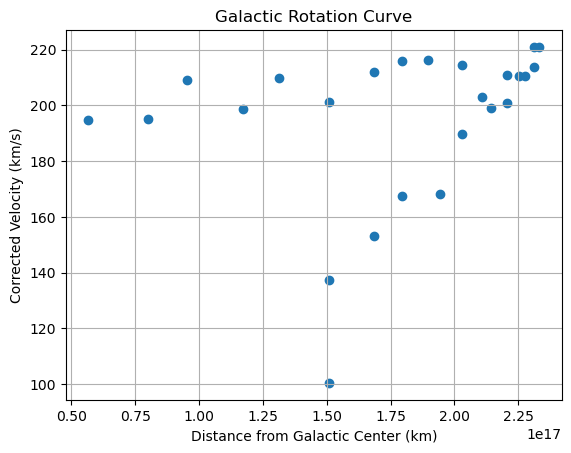

In [53]:
# Constants
v_sun = 220  # km/s (Sun's orbital speed)
R_0 = 2.345e17  # km (Distance of the Sun from the Galactic center)

# Observed Values
observed_velocity = max_data_array[:, 1] 
observed_longitude = max_data_array[:, 0]  # Degrees

# degrees to radians
longitude_rad = np.radians(observed_longitude)

# Velocity correction
corrected_velocity = observed_velocity + v_sun * np.sin(longitude_rad)

# Radial distance
distance = R_0 * np.sin(longitude_rad)  

#Plotting
plt.scatter(distance, corrected_velocity)
plt.xlabel("Distance from Galactic Center (km)")
plt.ylabel("Corrected Velocity (km/s)")
plt.title("Galactic Rotation Curve")
plt.grid()
plt.show()

### Remove longitudes above 90 deg

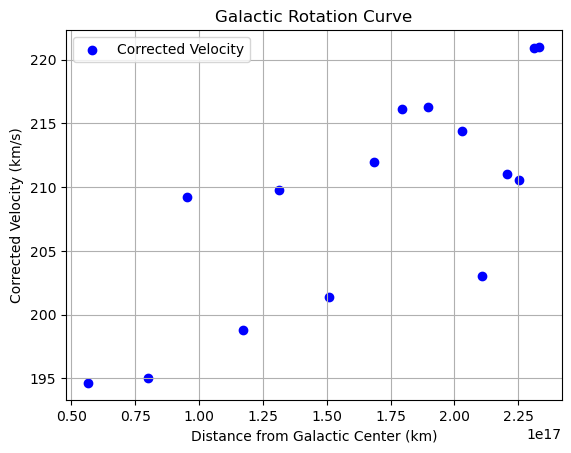

In [55]:

# Constants
v_sun = 220  # km/s (Sun's orbital speed)
R_0 = 2.345e17  # km (Distance of the Sun from the Galactic center)

# Data
max_data_array2 = np.array([
    [14.0, 141.41188, 454.572],
    [20.0, 119.75048463, 468.706],
    [24.0, 119.75048463, 468.706],
    [30.0, 88.81105652, 524.899],
    [34.0, 86.74865494, 494.474],
    [40.0, 59.9400156, 537.22],
    [46.0, 53.7540872, 555.841],
    [50.0, 47.56841401, 552.431],
    [54.0, 38.29038273, 520.161],
    [60.0, 23.85903083, 526.464],
    [64.0, 5.30647663, 551.465],
    [70.0, 4.2758465, 579.992],
    [74.0, -0.87719789, 580.033],
    [80.0, 4.2758465, 570.31],
    [84.0, 2.21460748, 529.285]
])

# Observed Values
observed_velocity = max_data_array2[:, 1] 
observed_longitude = max_data_array2[:, 0]  # Degrees

# Convert degrees to radians
longitude_rad = np.radians(observed_longitude)

# Velocity correction
corrected_velocity = observed_velocity + v_sun * np.sin(longitude_rad)

# Radial distance
distance = R_0 * np.sin(longitude_rad)  

# Plotting
plt.scatter(distance, corrected_velocity, color='b', label="Corrected Velocity")
plt.xlabel("Distance from Galactic Center (km)")
plt.ylabel("Corrected Velocity (km/s)")
plt.title("Galactic Rotation Curve")
plt.grid(True)
plt.legend()
plt.show()


### Questions

1. Work out the energy gap (in eV) between the levels responsible for the 21-cm line.



2. How do line profiles found in this experiment differ from those shown in Fig. 1, and why? 
Hint: in part it is because Fig. 1 was obtained with a larger (25 m) dish, which
affects the strength of the component at zero velocity for a reason you should be able
to figure out. There are other obvious differences as well.


3. On a particular line of sight through the disk, with a longitude in the range 0° < 𝑙 < 90°, where would you expect to find the gas with the largest 𝑣𝑟? Use you sketch diagram to answer this.


4. The hydrogen gas has a physical temperature of ~8000 K. What is the rms thermal radial speed of the atoms? How will the thermal motion affect your spectra?



5. Why is the physical temperature so much higher than the brightness temperature of the gas?




6. Some spectra contain very narrow spikes quite far in frequency from the main 21-cm line. These are just as often negative as positive. What’s going on? Hint: Read Section 5.3 carefully!




7. Estimate the mass of the Galaxy contained inside 𝑅0. 